In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Installing the necessary packages
!pip install dfply
!pip install ggplot
!pip install pandas==0.19.2

     |████████████████████████████████| 614kB 2.9MB/s 
     |████████████████████████████████| 2.2MB 2.9MB/s 
     |████████████████████████████████| 18.9MB 2.9MB/s 
ERROR: plotnine 0.5.1 has requirement pandas>=0.23.4, but you'll have pandas 0.19.2 which is incompatible.
ERROR: mizani 0.5.4 has requirement pandas>=0.23.4, but you'll have pandas 0.19.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.19.2 which is incompatible.
ERROR: featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.19.2 which is incompatible.
ERROR: fbprophet 0.5 has requirement pandas>=0.23.4, but you'll have pandas 0.19.2 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [0]:
#Loading data from the google drive to colab notebook

# Please change the filename as per the location where the file is stored

filename = '/content/drive/My Drive/Packt_Colab/bank-full.csv'

In [0]:
# Importing necessary packages
from dfply import *
from ggplot import *

In [0]:
# Reading the banking data
bankData = pd.read_csv(filename,sep=";")

In [4]:
# Getting the total counts under each job category

jobTot = (bankData >> group_by(X.job) >> summarise(jobTot = X.y.count()))
jobTot

,job,jobTot
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938
9,technician,7597


In [0]:
# Getting all the details in one place

jobProp = (bankData >> group_by(X.job,X.y) >> summarise(jobCat = X.y.count()))

In [6]:
# Merging both the data frames
jobComb = (pd.merge(jobProp,jobTot,left_on = ['job'],right_on = ['job']) >> mutate(catProp = (X.jobCat/X.jobTot)*100))

jobComb.head()

,y,job,jobCat,jobTot,catProp
0,no,admin.,4540,5171,87.797331
1,yes,admin.,631,5171,12.202669
2,no,blue-collar,9024,9732,92.725031
3,yes,blue-collar,708,9732,7.274969
4,no,entrepreneur,1364,1487,91.728312


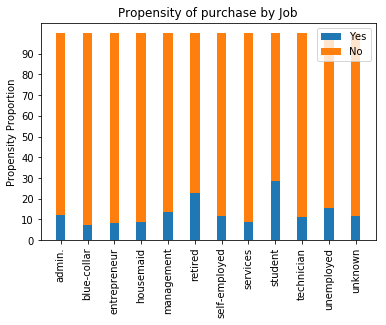

In [7]:
import matplotlib.pyplot as plt

# Create seperate data frames for Yes and No
jobcombYes = (jobComb >> mask(X.y == 'yes'))
jobcombNo = (jobComb >> mask(X.y == 'no'))

# Get the length of the xaxis labels 
xlabels = len(list(jobTot['job']))
# Get the proportion values 
jobYes = list(jobcombYes['catProp'])
jobNo = list(jobcombNo['catProp'])

# Arrange the indexes of x asix
ind = np.arange(xlabels)
# Get the width of each bar
width = 0.35  
# Getting the plots
p1 = plt.bar(ind, jobYes, width)
p2 = plt.bar(ind, jobNo, width,bottom=jobYes)

plt.ylabel('Propensity Proportion')
plt.title('Propensity of purchase by Job')

# Defining the x label indexes and y label indexes
plt.xticks(ind, list(jobTot['job']))
plt.yticks(np.arange(0, 100, 10))

# Defining the legends
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

# To rotate the axis labels 
plt.xticks(rotation=90)
plt.show()